In [63]:
import json
import pandas as pd


def flatten_row(row):
    return {k: v for item in row for k, v in item.items()}


category_data = [flatten_row(row) for row in data['sheets'][1]['data']]
category_df = pd.DataFrame(category_data)


product_data = [flatten_row(row) for row in data['sheets'][2]['data']]
product_df = pd.DataFrame(product_data)


merged_df = product_df.merge(category_df[['ID', 'Category_Name', 'Subcategory_Name']],
                            left_on='Category_ID', right_on='ID', suffixes=('', '_Category'))

# Select relevant columns
relevant_columns = [
    'ID', 'Name', 'Name_subtitle', 'Keywords', 'Category_Name', 'Subcategory_Name',
    'Pantry_Min', 'Pantry_Max', 'Pantry_Metric', 'Pantry_tips',
    'DOP_Pantry_Min', 'DOP_Pantry_Max', 'DOP_Pantry_Metric', 'DOP_Pantry_tips',
    'Pantry_After_Opening_Min', 'Pantry_After_Opening_Max', 'Pantry_After_Opening_Metric',
    'Refrigerate_Min', 'Refrigerate_Max', 'Refrigerate_Metric', 'Refrigerate_tips',
    'DOP_Refrigerate_Min', 'DOP_Refrigerate_Max', 'DOP_Refrigerate_Metric', 'DOP_Refrigerate_tips',
    'Refrigerate_After_Opening_Min', 'Refrigerate_After_Opening_Max', 'Refrigerate_After_Opening_Metric',
    'Refrigerate_After_Thawing_Min', 'Refrigerate_After_Thawing_Max', 'Refrigerate_After_Thawing_Metric',
    'Freeze_Min', 'Freeze_Max', 'Freeze_Metric', 'Freeze_Tips',
    'DOP_Freeze_Min', 'DOP_Freeze_Max', 'DOP_Freeze_Metric', 'DOP_Freeze_Tips'
]

filtered_df = merged_df[relevant_columns]

# Updated convert_to_days function with better error handling
def convert_to_days(min_val, max_val, metric):
    try:
        # If any input is NaN or None, return NaN for both outputs
        if pd.isna(min_val) or pd.isna(max_val) or pd.isna(metric):
            return pd.NA, pd.NA
        
        # Ensure min_val and max_val are numeric
        min_val = float(min_val)
        max_val = float(max_val)
        
        # Handle metric conversion
        metric = str(metric).lower().strip()
        if metric == 'days':
            return min_val, max_val
        elif metric == 'weeks':
            return min_val * 7, max_val * 7
        elif metric == 'months':
            return min_val * 30, max_val * 30  
        else:
            
            return pd.NA, pd.NA
    except (ValueError, TypeError):
        
        return pd.NA, pd.NA


for prefix in ['Pantry', 'DOP_Pantry', 'Pantry_After_Opening', 'Refrigerate', 'DOP_Refrigerate',
               'Refrigerate_After_Opening', 'Refrigerate_After_Thawing', 'Freeze', 'DOP_Freeze']:
    min_col = f'{prefix}_Min'
    max_col = f'{prefix}_Max'
    metric_col = f'{prefix}_Metric'
    if min_col in filtered_df.columns and max_col in filtered_df.columns and metric_col in filtered_df.columns:
        
        results = [convert_to_days(row[min_col], row[max_col], row[metric_col]) for _, row in filtered_df.iterrows()]
        filtered_df[f'{prefix}_Min_Days'] = [r[0] for r in results]
        filtered_df[f'{prefix}_Max_Days'] = [r[1] for r in results]


drop_columns = [col for col in filtered_df.columns if col.endswith('_Min') or col.endswith('_Max') if not col.endswith('_Days')]
filtered_df = filtered_df.drop(columns=drop_columns)

# Handle special metrics
filtered_df['Refrigerate_Metric'] = filtered_df['Refrigerate_Metric'].replace('Package use-by date', 'UseByDate')
filtered_df['Freeze_Metric'] = filtered_df['Freeze_Metric'].replace('Not Recommended', 'NotRecommended')

# Save to CSV
output_path = 'foodkeeper_data.csv'
filtered_df.to_csv(output_path, index=False)
print(f"Data saved to {output_path}")

NameError: name 'data' is not defined

In [75]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hp\FoodKeeper-Data.csv", encoding='ISO-8859-1')  # or 'latin1'
df



,ID,Category_ID,Name,Name_subtitle,Keywords,Pantry_Min,Pantry_Max,Pantry_Metric,Pantry_tips,DOP_Pantry_Min,...,DOP_Freeze_Metric,DOP_Freeze_Tips,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,1.0,7.0,Butter,NaN,Butter,NaN,NaN,NaN,May be left at room temperature for 1 - 2 days.,NaN,...,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,7.0,Buttermilk,NaN,Buttermilk,NaN,NaN,NaN,NaN,NaN,...,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,7.0,Cheese,"hard such as cheddar, swiss, block parmesan","Cheese,cheddar, swiss,parmesan",NaN,NaN,NaN,NaN,NaN,...,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,7.0,Cheese,parmesan; shredded or grated,"Cheese,parmesan,shredded,grated",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,7.0,Cheese,"shredded; cheddar, mozzarella, etc.","Cheese,shredded,cheddar,mozzarella",NaN,NaN,NaN,NaN,NaN,...,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv(r"C:\Users\hp\FoodKeeper-Data.csv", encoding='ISO-8859-1')  # or 'latin1'
df

# Example: Distribution of Pantry storage max days
plt.figure(figsize=(10,6))
sns.histplot(filtered_df['Pantry_Max_Days'].dropna(), kde=True, bins=30)
plt.title("Pantry Max Storage Duration (in Days)")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


NameError: name 'filtered_df' is not defined

<Figure size 1000x600 with 0 Axes>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. LOAD DATA
df = pd.read_csv(r"C:\Users\hp\FoodKeeper-Data.csv", encoding='ISO-8859-1')

# 2. QUICK LOOK
print(df.head())
print(df.info())
print(df.describe())

# 3. DROP UNNECESSARY COLUMNS (if any)
df.drop(columns=['Link'], inplace=True, errors='ignore')

# 4. HANDLE MISSING VALUES
df.fillna(0, inplace=True)  # or use df.dropna() for stricter cleaning


df['Pantry_Avg'] = (df['PantryMin'] + df['PantryMax']) / 2
df['Fridge_Avg'] = (df['RefrigeratorMin'] + df['RefrigeratorMax']) / 2
df['Freezer_Avg'] = (df['FreezerMin'] + df['FreezerMax']) / 2


le = LabelEncoder()
df['FoodGroup'] = le.fit_transform(df['FoodGroup'])
df['Food'] = le.fit_transform(df['Food'])
df['ProductState'] = le.fit_transform(df['ProductState'])
df['ProductForm'] = le.fit_transform(df['ProductForm'])


features = ['FoodGroup', 'Food', 'ProductState', 'ProductForm']
target = 'Fridge_Avg'  

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")

# 11. VISUALIZE RESULTS
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Expiry Days (Fridge)")
plt.ylabel("Predicted Expiry Days (Fridge)")
plt.title("Actual vs Predicted Expiry (Fridge)")
plt.grid()
plt.show()


sample = X_test.iloc[0:1]
sample_pred = model.predict(sample)
print(f"\n📦 Sample Prediction:")
print(f"Input: {sample}")
print(f"Predicted Expiry (Fridge): {sample_pred[0]:.2f} days")


    ID  Category_ID        Name                                Name_subtitle  \
0  1.0          7.0      Butter                                          NaN   
1  2.0          7.0  Buttermilk                                          NaN   
2  3.0          7.0      Cheese  hard such as cheddar, swiss, block parmesan   
3  4.0          7.0      Cheese                 parmesan; shredded or grated   
4  5.0          7.0      Cheese          shredded; cheddar, mozzarella, etc.   

                             Keywords  Pantry_Min  Pantry_Max Pantry_Metric  \
0                              Butter         NaN         NaN           NaN   
1                          Buttermilk         NaN         NaN           NaN   
2      Cheese,cheddar, swiss,parmesan         NaN         NaN           NaN   
3     Cheese,parmesan,shredded,grated         NaN         NaN           NaN   
4  Cheese,shredded,cheddar,mozzarella         NaN         NaN           NaN   

                                       Pantr

KeyError: 'PantryMin'

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\hp\FoodKeeper-Data.csv", encoding='ISO-8859-1')

# Check structure
print("📊 Dataset shape:", df.shape)
print("🔍 Columns:", df.columns.tolist())

# Check for null values
print("\n🕳️ Missing values:")
print(df.isnull().sum())

# View data types and sample data
print("\n📦 Data Types:")
print(df.dtypes)

print("\n👀 Sample data:")
print(df.head())

# Drop rows where all shelf life values are missing (they don't help)
shelf_cols = ['PantryMin', 'PantryMax', 'RefrigeratorMin', 'RefrigeratorMax', 'FreezerMin', 'FreezerMax']
df.dropna(subset=shelf_cols, how='all', inplace=True)

# Optional: Fill partial NaNs with 0 (or better: use median if needed)
df[shelf_cols] = df[shelf_cols].fillna(0)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Check again
print("\n✅ Cleaned shape:", df.shape)
print("✅ Cleaned missing values:")
print(df.isnull().sum())


In [83]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\hp\FoodKeeper-Data.csv", encoding='ISO-8859-1')

# Check structure
print("📊 Dataset shape:", df.shape)
print("🔍 Columns:", df.columns.tolist())

# Check for null values
print("\n🕳️ Missing values:")
print(df.isnull().sum())

# View data types and sample data
print("\n📦 Data Types:")
print(df.dtypes)

print("\n👀 Sample data:")
print(df.head())

# Define the correct shelf life column names
shelf_cols = ['Pantry_Min', 'Pantry_Max', 'Refrigerate_Min', 'Refrigerate_Max', 'Freeze_Min', 'Freeze_Max']

# Drop rows where all shelf life values are missing
df.dropna(subset=shelf_cols, how='all', inplace=True)

# Optional: Fill partial NaNs in shelf life columns with 0 (or you can use median if needed)
df[shelf_cols] = df[shelf_cols].fillna(0)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Drop unnamed empty columns at the end
df.drop(columns=[col for col in df.columns if "Unnamed" in col], inplace=True)

# Check again
print("\n✅ Cleaned shape:", df.shape)
print("✅ Cleaned missing values:")
print(df.isnull().sum())



📊 Dataset shape: (778, 46)
🔍 Columns: ['ID', 'Category_ID', 'Name', 'Name_subtitle', 'Keywords', 'Pantry_Min', 'Pantry_Max', 'Pantry_Metric', 'Pantry_tips', 'DOP_Pantry_Min', 'DOP_Pantry_Max', 'DOP_Pantry_Metric', 'DOP_Pantry_tips', 'Pantry_After_Opening_Min', 'Pantry_After_Opening_Max', 'Pantry_After_Opening_Metric', 'Refrigerate_Min', 'Refrigerate_Max', 'Refrigerate_Metric', 'Refrigerate_tips', 'DOP_Refrigerate_Min', 'DOP_Refrigerate_Max', 'DOP_Refrigerate_Metric', 'DOP_Refrigerate_tips', 'Refrigerate_After_Opening_Min', 'Refrigerate_After_Opening_Max', 'Refrigerate_After_Opening_Metric', 'Refrigerate_After_Thawing_Min', 'Refrigerate_After_Thawing_Max', 'Refrigerate_After_Thawing_Metric', 'Freeze_Min', 'Freeze_Max', 'Freeze_Metric', 'Freeze_Tips', 'DOP_Freeze_Min', 'DOP_Freeze_Max', 'DOP_Freeze_Metric', 'DOP_Freeze_Tips', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45']

🕳️ Missing values:
ID                      

In [85]:
import pandas as pd

# Replace with your actual file name if it's different
df_clean = pd.read_csv(r"C:\Users\hp\FoodKeeper-Data.csv", encoding='ISO-8859-1')

# Just to double-check everything's good
print(df_clean.shape)
df_clean.head()


(778, 46)


,ID,Category_ID,Name,Name_subtitle,Keywords,Pantry_Min,Pantry_Max,Pantry_Metric,Pantry_tips,DOP_Pantry_Min,...,DOP_Freeze_Metric,DOP_Freeze_Tips,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,1.0,7.0,Butter,NaN,Butter,NaN,NaN,NaN,May be left at room temperature for 1 - 2 days.,NaN,...,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,7.0,Buttermilk,NaN,Buttermilk,NaN,NaN,NaN,NaN,NaN,...,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,7.0,Cheese,"hard such as cheddar, swiss, block parmesan","Cheese,cheddar, swiss,parmesan",NaN,NaN,NaN,NaN,NaN,...,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,7.0,Cheese,parmesan; shredded or grated,"Cheese,parmesan,shredded,grated",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,7.0,Cheese,"shredded; cheddar, mozzarella, etc.","Cheese,shredded,cheddar,mozzarella",NaN,NaN,NaN,NaN,NaN,...,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\hp\FoodKeeper-Data.csv", encoding='ISO-8859-1')

# Check structure
print("📊 Dataset shape:", df.shape)
print("🔍 Columns:", df.columns.tolist())

# Check for null values
print("\n🕳️ Missing values:")
print(df.isnull().sum())

# View data types and sample data
print("\n📦 Data Types:")
print(df.dtypes)

print("\n👀 Sample data:")
print(df.head())

# Define the correct shelf life column names
shelf_cols = ['Pantry_Min', 'Pantry_Max', 'Refrigerate_Min', 'Refrigerate_Max', 'Freeze_Min', 'Freeze_Max']

# Drop rows where all shelf life values are missing
df.dropna(subset=shelf_cols, how='all', inplace=True)

# Optional: Fill partial NaNs in shelf life columns with 0 (or you can use median if needed)
df[shelf_cols] = df[shelf_cols].fillna(0)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Drop unnamed empty columns at the end
df.drop(columns=[col for col in df.columns if "Unnamed" in col], inplace=True)

# ✅ Save the cleaned dataset
df.to_csv(r"C:\Users\hp\FoodKeeper-Cleaned.csv", index=False)

# Final check
print("\n✅ Cleaned shape:", df.shape)
print("✅ Cleaned missing values:")
print(df.isnull().sum())

print("\n💾 Cleaned data saved to: C:\\Users\\hp\\FoodKeeper-Cleaned.csv")


📊 Dataset shape: (778, 46)
🔍 Columns: ['ID', 'Category_ID', 'Name', 'Name_subtitle', 'Keywords', 'Pantry_Min', 'Pantry_Max', 'Pantry_Metric', 'Pantry_tips', 'DOP_Pantry_Min', 'DOP_Pantry_Max', 'DOP_Pantry_Metric', 'DOP_Pantry_tips', 'Pantry_After_Opening_Min', 'Pantry_After_Opening_Max', 'Pantry_After_Opening_Metric', 'Refrigerate_Min', 'Refrigerate_Max', 'Refrigerate_Metric', 'Refrigerate_tips', 'DOP_Refrigerate_Min', 'DOP_Refrigerate_Max', 'DOP_Refrigerate_Metric', 'DOP_Refrigerate_tips', 'Refrigerate_After_Opening_Min', 'Refrigerate_After_Opening_Max', 'Refrigerate_After_Opening_Metric', 'Refrigerate_After_Thawing_Min', 'Refrigerate_After_Thawing_Max', 'Refrigerate_After_Thawing_Metric', 'Freeze_Min', 'Freeze_Max', 'Freeze_Metric', 'Freeze_Tips', 'DOP_Freeze_Min', 'DOP_Freeze_Max', 'DOP_Freeze_Metric', 'DOP_Freeze_Tips', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45']

🕳️ Missing values:
ID                      

In [89]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\hp\FoodKeeper-Cleaned.csv", encoding='ISO-8859-1')
df.head(19)

,ID,Category_ID,Name,Name_subtitle,Keywords,Pantry_Min,Pantry_Max,Pantry_Metric,Pantry_tips,DOP_Pantry_Min,...,Refrigerate_After_Thawing_Max,Refrigerate_After_Thawing_Metric,Freeze_Min,Freeze_Max,Freeze_Metric,Freeze_Tips,DOP_Freeze_Min,DOP_Freeze_Max,DOP_Freeze_Metric,DOP_Freeze_Tips
0,12.0,7.0,Cream,"whipped, sweetened","Cream,whipped, sweetened",0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,1.0,2.0,Months,NaN,NaN,NaN,NaN,NaN
1,22.0,7.0,Eggs,"raw whites, yolks","Eggs,raw whites, yolks,egg,whites",0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,12.0,12.0,Months,NaN,NaN,NaN,NaN,NaN
2,23.0,7.0,Eggs,hard boiled cooked,"Eggs,egg,hard boiled cooked,boiled,hard boiled",0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,Not Recommended,NaN,NaN,NaN,NaN,NaN
3,24.0,7.0,Egg dishes,NaN,"Egg dishes,egg,dishes",0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,2.0,3.0,Months,Freezing guidance applies to egg dishes after ...,NaN,NaN,NaN,NaN
4,32.0,7.0,Whipped topping,tub,"Whipped topping,topping,tub,whipped",0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,14.0,14.0,Months,NaN,NaN,NaN,NaN,NaN
5,33.0,7.0,Yogurt,NaN,Yogurt,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,1.0,2.0,Months,NaN,NaN,NaN,NaN,NaN
6,110.0,11.0,Jerky,homemade,"Jerky,homemade",1.0,2.0,Months,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,131.0,17.0,"Stuffed, raw chicken breasts",NaN,"Stuffed,raw chicken breasts,breast,chicken,chi...",0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,9.0,9.0,Months,NaN,NaN,NaN,NaN,NaN
8,132.0,17.0,Raw kabobs with vegetables,NaN,"Raw kabobs,vegetables,kabobs,kabob,vegetable",0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,3.0,4.0,Months,NaN,NaN,NaN,NaN,NaN
9,135.0,14.0,Cooked poultry dishes,NaN,"Cooked poultry dishes,poultry dishes,poultry",0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,4.0,6.0,Months,NaN,NaN,NaN,NaN,NaN


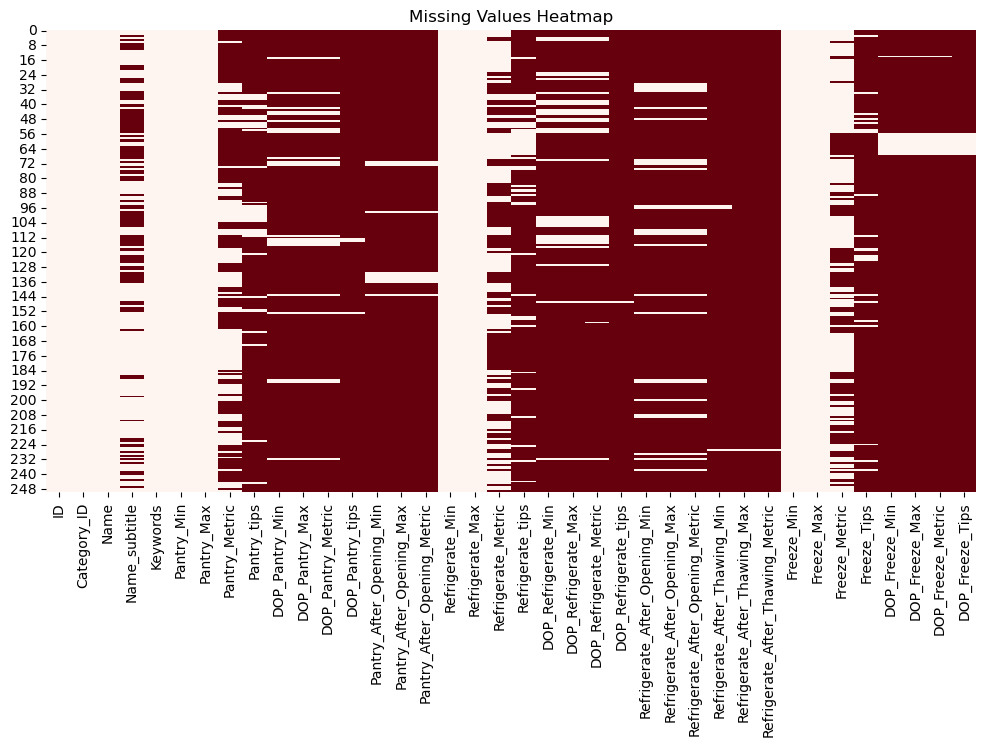

In [91]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()


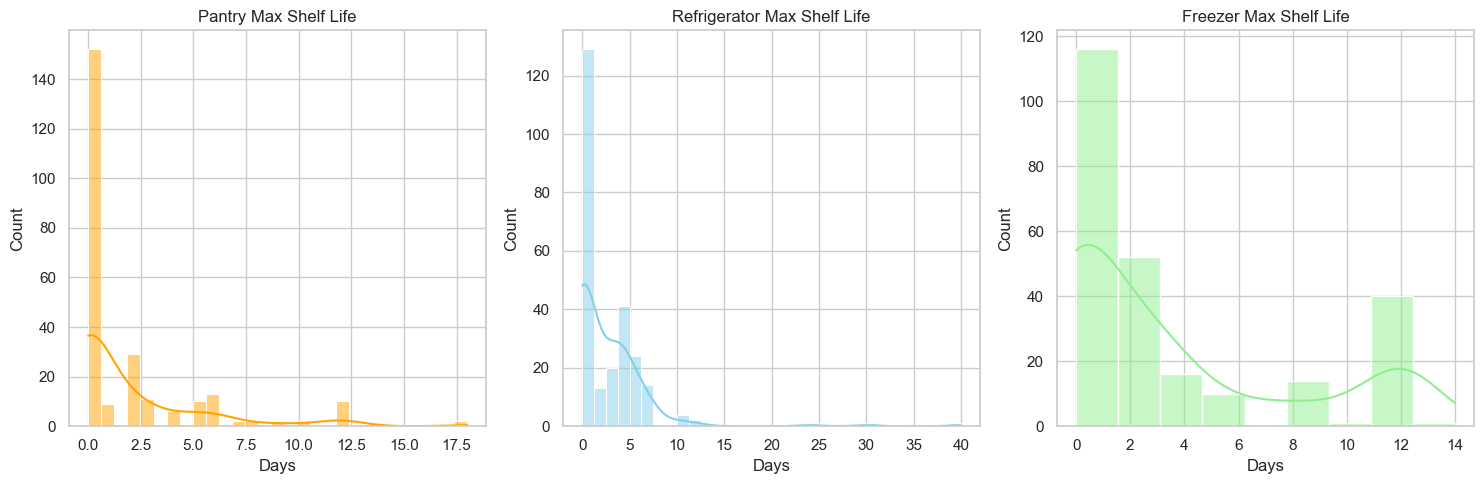

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# Pantry Shelf Life Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Pantry_Max'], kde=True, color='orange')
plt.title("Pantry Max Shelf Life")
plt.xlabel("Days")

# Refrigerator Shelf Life Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Refrigerate_Max'], kde=True, color='skyblue')
plt.title("Refrigerator Max Shelf Life")
plt.xlabel("Days")

# Freezer Shelf Life Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Freeze_Max'], kde=True, color='lightgreen')
plt.title("Freezer Max Shelf Life")
plt.xlabel("Days")

plt.tight_layout()
plt.show()


     ID  Category_ID             Name       Name_subtitle  \
0  12.0          7.0            Cream  whipped, sweetened   
1  22.0          7.0             Eggs   raw whites, yolks   
2  23.0          7.0             Eggs  hard boiled cooked   
3  24.0          7.0       Egg dishes                 NaN   
4  32.0          7.0  Whipped topping                 tub   

                                         Keywords  Pantry_Min  Pantry_Max  \
0                        Cream,whipped, sweetened         0.0         0.0   
1               Eggs,raw whites, yolks,egg,whites         0.0         0.0   
2  Eggs,egg,hard boiled cooked,boiled,hard boiled         0.0         0.0   
3                           Egg dishes,egg,dishes         0.0         0.0   
4             Whipped topping,topping,tub,whipped         0.0         0.0   

  Pantry_Metric Pantry_tips  DOP_Pantry_Min  ...  \
0           NaN         NaN             NaN  ...   
1           NaN         NaN             NaN  ...   
2           Na

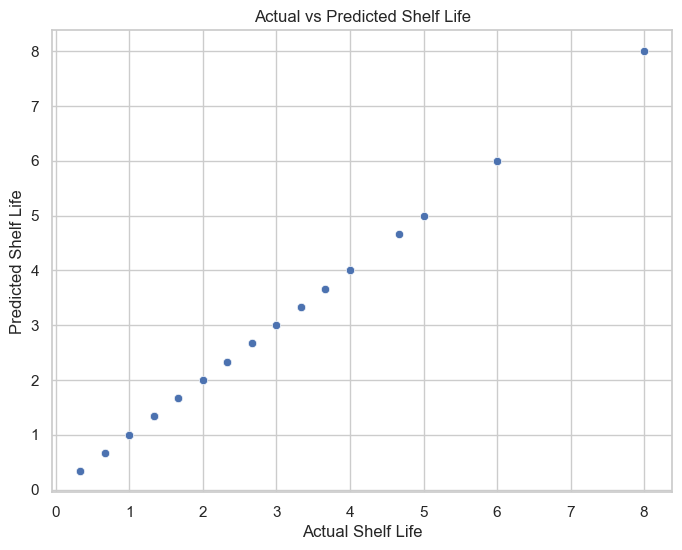

In [95]:
# Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
df = pd.read_csv('FoodKeeper-Cleaned.csv')

# Step 3: Quick peek
print(df.head())
print(df.info())

# Step 4: Handle missing values if any
df = df.dropna(subset=['Pantry_Max', 'Refrigerate_Max', 'Freeze_Max'])

# Optional: Create a new column that represents a general expiry estimate (you can change this logic)
df['Avg_Shelf_Life'] = df[['Pantry_Max', 'Refrigerate_Max', 'Freeze_Max']].mean(axis=1)

# Step 5: Define features (X) and target (y)
X = df[['Pantry_Max', 'Refrigerate_Max', 'Freeze_Max']]
y = df['Avg_Shelf_Life']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Step 10: Visualize actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Shelf Life")
plt.ylabel("Predicted Shelf Life")
plt.title("Actual vs Predicted Shelf Life")
plt.grid(True)
plt.show()


In [97]:
import pandas as pd

# Load the dataset
df = pd.read_csv('FoodKeeper-Cleaned.csv')

# Normalize product names for easier search
df['Name'] = df['Name'].str.strip().str.lower()

# Function to get shelf life of a product
def get_shelf_life(product_name):
    product_name = product_name.strip().lower()
    result = df[df['Name'] == product_name]

    if result.empty:
        print(f" No data found for '{product_name}'")
    else:
        print(f" Shelf life for: {product_name.title()}")
        print("Pantry Max Days:", result.iloc[0]['Pantry_Max'])
        print("Refrigerator Max Days:", result.iloc[0]['Refrigerate_Max'])
        print("Freezer Max Days:", result.iloc[0]['Freeze_Max'])

# Try it out!
get_shelf_life("rice")
get_shelf_life("eggs")
get_shelf_life("milk")


 No data found for 'rice'
 Shelf life for: Eggs
Pantry Max Days: 0.0
Refrigerator Max Days: 4.0
Freezer Max Days: 12.0
 Shelf life for: Milk
Pantry Max Days: 0.0
Refrigerator Max Days: 3.0
Freezer Max Days: 0.0


In [99]:
import pandas as pd

# 1. Load and inspect data
df = pd.read_csv("FoodKeeper-Cleaned.csv")

# 2. Clean product names for easier matching
df['Name'] = df['Name'].str.strip().str.lower()


def get_shelf_life(product_name, storage_type):
    product_name = product_name.lower()
    storage_type = storage_type.lower()

    match = df[df['Name'] == product_name]

    if match.empty:
        return f" Product '{product_name}' not found in the dataset."

    if storage_type == "pantry":
        shelf_life = match['Pantry_Max'].values[0]
        unit = match['Pantry_Metric'].values[0]
    elif storage_type == "refrigerate":
        shelf_life = match['Refrigerate_Max'].values[0]
        unit = match['Refrigerate_Metric'].values[0]
    elif storage_type == "freeze":
        shelf_life = match['Freeze_Max'].values[0]
        unit = match['Freeze_Metric'].values[0]
    else:
        return " Please choose a valid storage condition: pantry, refrigerate, or freeze."

    if pd.isna(shelf_life):
        return f"ℹ Shelf life info for '{product_name}' under '{storage_type}' storage not available."
    
    return f" '{product_name.title()}' lasts around {int(shelf_life)} {unit} when stored in {storage_type}."

# 🔍 Example usage:
print(get_shelf_life("rice", "pantry"))
print(get_shelf_life("milk", "refrigerate"))
print(get_shelf_life("eggs", "refrigerate"))


 Product 'rice' not found in the dataset.
 'Milk' lasts around 3 Months when stored in refrigerate.
 'Eggs' lasts around 4 Days when stored in refrigerate.


In [101]:
import pandas as pd

df = pd.read_csv("FoodKeeper-Cleaned.csv")
print(df.columns.tolist())


['ID', 'Category_ID', 'Name', 'Name_subtitle', 'Keywords', 'Pantry_Min', 'Pantry_Max', 'Pantry_Metric', 'Pantry_tips', 'DOP_Pantry_Min', 'DOP_Pantry_Max', 'DOP_Pantry_Metric', 'DOP_Pantry_tips', 'Pantry_After_Opening_Min', 'Pantry_After_Opening_Max', 'Pantry_After_Opening_Metric', 'Refrigerate_Min', 'Refrigerate_Max', 'Refrigerate_Metric', 'Refrigerate_tips', 'DOP_Refrigerate_Min', 'DOP_Refrigerate_Max', 'DOP_Refrigerate_Metric', 'DOP_Refrigerate_tips', 'Refrigerate_After_Opening_Min', 'Refrigerate_After_Opening_Max', 'Refrigerate_After_Opening_Metric', 'Refrigerate_After_Thawing_Min', 'Refrigerate_After_Thawing_Max', 'Refrigerate_After_Thawing_Metric', 'Freeze_Min', 'Freeze_Max', 'Freeze_Metric', 'Freeze_Tips', 'DOP_Freeze_Min', 'DOP_Freeze_Max', 'DOP_Freeze_Metric', 'DOP_Freeze_Tips']


In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


df = pd.read_csv("FoodKeeper-Cleaned.csv")


df_model = df[['Name', 'Pantry_Max', 'Refrigerate_Max', 'Freeze_Max']].copy()


df_melted = df_model.melt(id_vars='Name',
                          value_vars=['Pantry_Max', 'Refrigerate_Max', 'Freeze_Max'],
                          var_name='Storage_Type',
                          value_name='Shelf_Life')


df_melted.dropna(subset=['Shelf_Life'], inplace=True)
df_melted['Storage_Type'] = df_melted['Storage_Type'].str.replace('_Max', '').str.lower()
df_melted['Name'] = df_melted['Name'].str.lower()


X = df_melted[['Name', 'Storage_Type']]
y = df_melted['Shelf_Life']


categorical_features = ['Name', 'Storage_Type']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} days")


def predict_shelf_life(product_name, storage_type):
    product_name = product_name.lower()
    storage_type = storage_type.lower()
    return model.predict(pd.DataFrame([[product_name, storage_type]], columns=['Name', 'Storage_Type']))[0]


print("Example Prediction:")
print("Bread in pantry →", predict_shelf_life("bread", "pantry"), "days")


Mean Absolute Error: 2.71 days
Example Prediction:
Bread in pantry → 3.5 days


In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv("FoodKeeper-Cleaned.csv")

# Step 1: Select required columns
df = df[['Name', 'Pantry_Max', 'Refrigerate_Max', 'Freeze_Max']]

# Step 2: Drop rows with missing data
df.dropna(subset=['Name'], inplace=True)
df.fillna(0, inplace=True)  # replace NaN with 0 for ML processing

# Step 3: Melt the DataFrame to turn storage types into rows
df_melted = df.melt(id_vars=['Name'], 
                    value_vars=['Pantry_Max', 'Refrigerate_Max', 'Freeze_Max'], 
                    var_name='Storage_Type', 
                    value_name='Shelf_Life')


df_melted['Storage_Type'] = df_melted['Storage_Type'].str.replace('_Max', '', regex=False)
df_melted['Storage_Type'] = df_melted['Storage_Type'].str.lower()


df_melted['Name'] = df_melted['Name'].str.strip().str.lower()


df_encoded = pd.get_dummies(df_melted[['Name', 'Storage_Type']])
X = df_encoded
y = df_melted['Shelf_Life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#  Prediction function
def predict_shelf_life(product, storage_type):
    product = product.strip().lower()
    storage_type = storage_type.strip().lower()
    sample = pd.DataFrame([[0] * X.shape[1]], columns=X.columns)
    
    # Set appropriate columns to 1
    name_col = f'Name_{product}'
    storage_col = f'Storage_Type_{storage_type}'
    
    if name_col in sample.columns and storage_col in sample.columns:
        sample.at[0, name_col] = 1
        sample.at[0, storage_col] = 1
        prediction = model.predict(sample)[0]
        print(f" Predicted shelf life of '{product}' in '{storage_type}' storage: {round(prediction)} days")
    else:
        print(" Sorry! Product or storage type not found in dataset.")

# Step 10: Check model accuracy
def print_accuracy():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print("\n Model Accuracy Metrics:")
    print(f"MAE: {mae:.2f} days")
    print(f"RMSE: {rmse:.2f} days")
    print(f"R² Score: {r2:.2f}")


def print_total_accuracy():
    max_life = df_melted['Shelf_Life'].max()
    min_life = df_melted['Shelf_Life'].min()
    range_life = max_life - min_life
    
    mae = mean_absolute_error(y_test, model.predict(X_test))
    
    if range_life == 0:
        print(" Shelf life range is zero. Accuracy cannot be calculated.")
    else:
        accuracy_percent = (1 - (mae / range_life)) * 100
        print(f" Total Model Accuracy (approx): {accuracy_percent:.2f}%")

# Example Predictions
predict_shelf_life("milk", "refrigerate")
predict_shelf_life("eggs", "pantry")
predict_shelf_life("rice", "pantry")

# Check Accuracy
print_accuracy()
print_total_accuracy()


 Predicted shelf life of 'milk' in 'refrigerate' storage: 2 days
 Predicted shelf life of 'eggs' in 'pantry' storage: 0 days
 Sorry! Product or storage type not found in dataset.

 Model Accuracy Metrics:
MAE: 2.71 days
RMSE: 4.53 days
R² Score: -0.37
 Total Model Accuracy (approx): 93.23%


In [111]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv("FoodKeeper-Cleaned.csv")

# Step 1: Select required columns
df = df[['Name', 'Pantry_Max', 'Refrigerate_Max', 'Freeze_Max']]

# Step 2: Drop rows with missing data
df.dropna(subset=['Name'], inplace=True)
df.fillna(0, inplace=True)  # replace NaN with 0 for ML processing

# Step 3: Melt the DataFrame to turn storage types into rows
df_melted = df.melt(id_vars=['Name'], 
                    value_vars=['Pantry_Max', 'Refrigerate_Max', 'Freeze_Max'], 
                    var_name='Storage_Type', 
                    value_name='Shelf_Life')

# Clean up
df_melted['Storage_Type'] = df_melted['Storage_Type'].str.replace('_Max', '', regex=False)
df_melted['Storage_Type'] = df_melted['Storage_Type'].str.lower()
df_melted['Name'] = df_melted['Name'].str.strip().str.lower()

# Encode text data
df_encoded = pd.get_dummies(df_melted[['Name', 'Storage_Type']])
X = df_encoded
y = df_melted['Shelf_Life']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction function
def predict_shelf_life(product, storage_type):
    product = product.strip().lower()
    storage_type = storage_type.strip().lower()
    sample = pd.DataFrame([[0] * X.shape[1]], columns=X.columns)
    
    name_col = f'Name_{product}'
    storage_col = f'Storage_Type_{storage_type}'
    
    if name_col in sample.columns and storage_col in sample.columns:
        sample.at[0, name_col] = 1
        sample.at[0, storage_col] = 1
        prediction = model.predict(sample)[0]
        print(f"🔍 Predicted shelf life of '{product}' in '{storage_type}' storage: {round(prediction)} days")
    else:
        print(" Sorry! Product or storage type not found in dataset.")


def print_accuracy():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print("\n Model Accuracy Metrics:")
    print(f"MAE: {mae:.2f} days")
    print(f"RMSE: {rmse:.2f} days")
    print(f"R² Score: {r2:.2f}")

def print_total_accuracy():
    max_life = df_melted['Shelf_Life'].max()
    min_life = df_melted['Shelf_Life'].min()
    range_life = max_life - min_life
    
    mae = mean_absolute_error(y_test, model.predict(X_test))
    
    if range_life == 0:
        print(" Shelf life range is zero. Accuracy cannot be calculated.")
    else:
        accuracy_percent = (1 - (mae / range_life)) * 100
        print(f" Total Model Accuracy (approx): {accuracy_percent:.2f}%")


def show_real_examples(n=10):
    y_pred = model.predict(X_test)
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
    results['Error (days)'] = abs(results['Actual'] - results['Predicted'])
    print("\n Sample Predictions vs. Actual Shelf Life:")
    print(results.head(n).round(2))


predict_shelf_life("milk", "refrigerate")
predict_shelf_life("eggs", "pantry")



print_accuracy()
print_total_accuracy()
show_real_examples(10)


🔍 Predicted shelf life of 'milk' in 'refrigerate' storage: 2 days
🔍 Predicted shelf life of 'eggs' in 'pantry' storage: 0 days

📊 Model Accuracy Metrics:
MAE: 2.71 days
RMSE: 4.53 days
R² Score: -0.37
✅ Total Model Accuracy (approx): 93.23%

📦 Sample Predictions vs. Actual Shelf Life:
   Actual  Predicted  Error (days)
0     0.0       0.20          0.20
1     4.0       0.30          3.70
2     2.0       0.00          2.00
3     1.0       0.00          1.00
4     0.0       1.76          1.76
5    12.0       4.08          7.92
6     0.0       0.48          0.48
7     0.0       0.07          0.07
8     0.0       0.36          0.36
9     1.0       0.90          0.10
